___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")

In [3]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [4]:
#df_female.SubjectId.nunique()

In [5]:
#df_female.rename({"SubjectId" : "subjectid"}, axis = 1, inplace=True)

In [6]:
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding='latin-1')

In [7]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [8]:
df_female.SubjectId.nunique()

1986

In [9]:
df_male.subjectid.nunique()

4082

In [10]:
df_female.rename({"SubjectId" : "subjectid"}, axis = 1, inplace=True)

In [11]:
df = pd.concat([df_female,df_male], axis=0, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

## Explore Data

In [12]:
df.shape

(6068, 108)

In [13]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [15]:
df.drop(columns=["Ethnicity", "WritingPreference", "SubjectNumericRace", "SubjectsBirthLocation", "PrimaryMOS", "Branch", "Component", "Installation", "subjectid", "Heightin", "Weightlbs", "Date"], axis =1, inplace=True)

In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0
bicristalbreadth,6068.0,274.735003,19.221034,197.0,262.00,274.0,288.00,362.0


In [18]:
df["Gender"] = df.Gender.apply(lambda x : 0 if x == "Female" else 1)

In [19]:
df.Gender.value_counts()

1    4082
0    1986
Name: Gender, dtype: int64

In [20]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [21]:
df = df.groupby('DODRace').filter(lambda x : len(x)>500)
#sub_df = df[df.groupby('DODRace').DODrace.transform('count')>500].copy() # 2nd way.

In [22]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

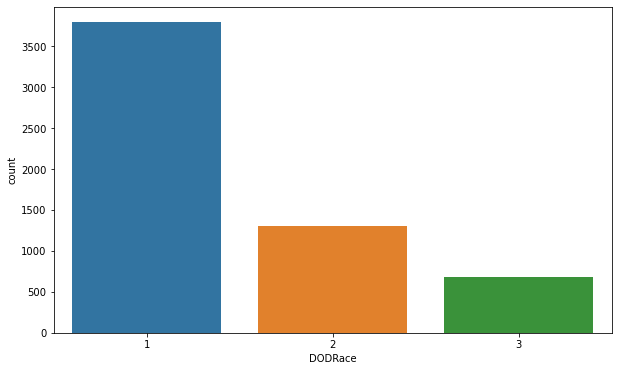

In [23]:
#sns.countplot(df['species']);
sns.countplot(df["DODRace"]);

In [24]:
df.shape

(5769, 96)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [25]:
X = df.drop("DODRace", axis = 1)
y = df["DODRace"]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [30]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_model = LogisticRegression()

In [36]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

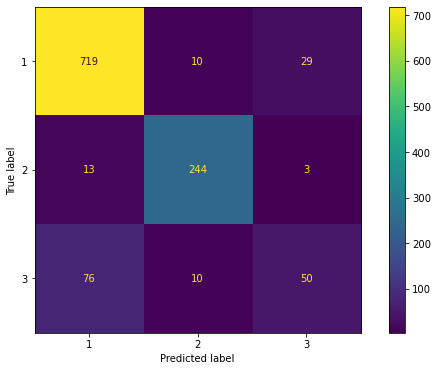

In [37]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

In [38]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [39]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[719  10  29]
 [ 13 244   3]
 [ 76  10  50]]
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       758
           2       0.92      0.94      0.93       260
           3       0.61      0.37      0.46       136

    accuracy                           0.88      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.86      0.88      0.87      1154


Train_Set
[[2927   28   79]
 [  58  957   23]
 [ 260   59  224]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.92      0.92      0.92      1038
           3       0.69      0.41      0.52       543

    accuracy                           0.89      4615
   macro avg       0.84      0.77      0.79      4615
weighted avg       0.88      0.89      0.88      4615



In [ ]:
#Both test and trains results show that th model works good with class 1 and 2, but for class 3 results are not good. 

### Logistic Model GridsearchCV

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [41]:
log_model = LogisticRegression(max_iter=5000)

In [42]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty" : penalty,
             "C" : C}

In [43]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=5) 

In [44]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [45]:
grid_model.best_params_

{'C': 0.20691380811147897, 'penalty': 'l2'}

In [46]:
grid_model.best_score_

0.8756229685807151

In [47]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

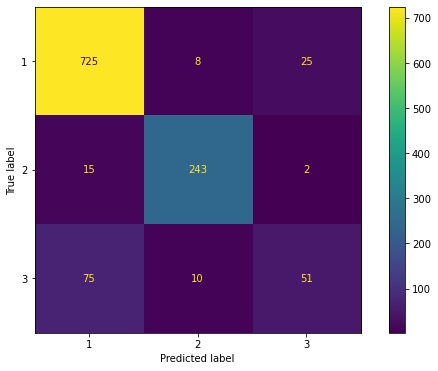

In [48]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [49]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[725   8  25]
 [ 15 243   2]
 [ 75  10  51]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       758
           2       0.93      0.93      0.93       260
           3       0.65      0.38      0.48       136

    accuracy                           0.88      1154
   macro avg       0.82      0.76      0.78      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[2934   29   71]
 [  65  952   21]
 [ 273   59  211]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.93      3034
           2       0.92      0.92      0.92      1038
           3       0.70      0.39      0.50       543

    accuracy                           0.89      4615
   macro avg       0.84      0.76      0.78      4615
weighted avg       0.88      0.89      0.88      4615



In [ ]:
# Grid search gives similar results.

## 2. SVC

### Vanilla SVC model 

###  SVC Model GridsearchCV

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [32]:
!pip install imblearn

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [34]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___